In [1]:
versioninfo()

Julia Version 1.9.1
Commit 147bdf428cd (2023-06-07 08:27 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 16 × AMD Ryzen 7 PRO 4750U with Radeon Graphics
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, znver2)
  Threads: 2 on 16 virtual cores
Environment:
  JULIA_PKG_SERVER = https://mirrors.tuna.tsinghua.edu.cn/julia


In [3]:
using Distributions
using StatsPlots
using StatsBase
using KernelDensity

using StatisticalRethinking

# setting default attributes for plots
default(labels=false)

# Code 3.1

In [4]:
Pr_Positive_Vampire = 0.95
Pr_Positive_Mortal = 0.01
Pr_Vampire = 0.001
tmp = Pr_Positive_Vampire * Pr_Vampire
Pr_Positive = tmp + Pr_Positive_Mortal * (1 - Pr_Vampire)
Pr_Vampire_Positive = tmp / Pr_Positive
Pr_Vampire_Positive

0.08683729433272395

# Code 3.2

In [114]:
function construct_posterior_and_sampling(no_of_tosses::Int32, no_of_ups::Int32, samples_count::Int64=10_000)
    size = 1000
    @show p_grid = range(0, 1; length=size)
    # flat prior
    prob_p = repeat([1.0], size);
    # likelihood (conditional probability) of seeing 6 up in 9 tossings given p
    prob_data = [pdf(Binomial(no_of_tosses, p), no_of_ups) for p in p_grid];
    posterior = prob_data .* prob_p
    posterior /= sum(posterior)

    cat = Categorical(posterior);
    samples = p_grid[rand(cat, samples_count)];
    return (p_grid, posterior, samples)
end

construct_posterior_and_sampling (generic function with 3 methods)

In [115]:
#=
size = 1000
@show p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);
prob_data = [pdf(Binomial(9, p), 6) for p in p_grid];
posterior = prob_data .* prob_p
posterior /= sum(posterior);
=#

p_grid, posterior, samples = construct_posterior_and_sampling(Int32(9), Int32(6))

p_grid = range(0, 1; length = size) = 0.0:0.001001001001001001:1.0


(0.0:0.001001001001001001:1.0, [0.0, 8.433658816529999e-19, 5.381332819661481e-17, 6.111248552252767e-16, 3.4233680569896395e-15, 1.301977811569362e-14, 3.875963258549832e-14, 9.744233005994771e-14, 2.1646380549927197e-13, 4.375070384958201e-13  …  5.823218682379397e-7, 4.114682141668325e-7, 2.7732470313529436e-7, 1.7570076237332623e-7, 1.022946034670045e-7, 5.269177907528289e-8, 2.2363727846061364e-8, 6.6663074687178874e-9, 8.383158000066749e-10, 0.0], [0.7487487487487487, 0.7307307307307307, 0.6106106106106106, 0.5395395395395396, 0.46646646646646645, 0.8878878878878879, 0.46346346346346345, 0.6556556556556556, 0.8058058058058059, 0.45645645645645644  …  0.7117117117117117, 0.7217217217217218, 0.6736736736736737, 0.8548548548548549, 0.7227227227227228, 0.4944944944944945, 0.7397397397397397, 0.6206206206206206, 0.5375375375375375, 0.6336336336336337])

In [116]:
posterior

1000-element Vector{Float64}:
 0.0
 8.433658816529999e-19
 5.381332819661481e-17
 6.111248552252767e-16
 3.4233680569896395e-15
 1.301977811569362e-14
 3.875963258549832e-14
 9.744233005994771e-14
 2.1646380549927197e-13
 4.375070384958201e-13
 8.207545114340039e-13
 1.4496105748714254e-12
 2.4359217775302152e-12
 ⋮
 1.050374395955915e-6
 7.939664540200766e-7
 5.823218682379397e-7
 4.114682141668325e-7
 2.7732470313529436e-7
 1.7570076237332623e-7
 1.022946034670045e-7
 5.269177907528289e-8
 2.2363727846061364e-8
 6.6663074687178874e-9
 8.383158000066749e-10
 0.0

In [117]:
sum(posterior)

0.9999999999999999

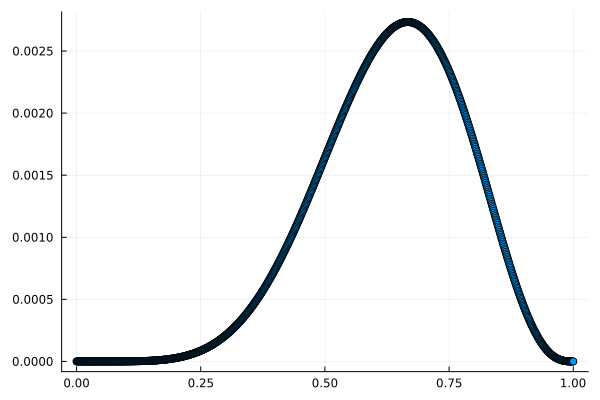

In [118]:
scatter(p_grid, posterior)

In [172]:
sum(posterior)

0.9999999999999999

# Code 3.3

In [41]:
?cat

search: cat catch Categorical catch_backtrace vcat hcat scatter scatter!



No documentation found.

`cat` is of type `Categorical{Float64, Vector{Float64}}`.

# Summary

```
struct Categorical{Float64, Vector{Float64}}
```

# Fields

```
support :: Base.OneTo{Int64}
p       :: Vector{Float64}
```

# Supertype Hierarchy

```
Categorical{Float64, Vector{Float64}} <: Distribution{Univariate, Discrete} <: Sampleable{Univariate, Discrete} <: Any
```


In [67]:
?rand

search: rand randn transcode @shorthands ZeroMeanDiagNormal



```
rand([rng=default_rng()], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:9` or `('x', "y", :z)`),
  * an `AbstractDict` or `AbstractSet` object,
  * a string (considered as a collection of characters), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to [`BigInt`](@ref)), to $[0, 1)$ for floating point numbers and to $[0, 1)+i[0, 1)$ for complex floating point numbers;

`S` defaults to [`Float64`](@ref). When only one argument is passed besides the optional `rng` and is a `Tuple`, it is interpreted as a collection of values (`S`) and not as `dims`.

!!! compat "Julia 1.1"
    Support for `S` as a tuple requires at least Julia 1.1.


# Examples

```julia-repl
julia> rand(Int, 2)
2-element Array{Int64,1}:
 1339893410598768192
 1575814717733606317

julia> using Random

julia> rand(MersenneTwister(0), Dict(1=>2, 3=>4))
1=>2

julia> rand((2, 3))
3

julia> rand(Float64, (2, 3))
2×3 Array{Float64,2}:
 0.999717  0.0143835  0.540787
 0.696556  0.783855   0.938235
```

!!! note
    The complexity of `rand(rng, s::Union{AbstractDict,AbstractSet})` is linear in the length of `s`, unless an optimized method with constant complexity is available, which is the case for `Dict`, `Set` and dense `BitSet`s. For more than a few calls, use `rand(rng, collect(s))` instead, or either `rand(rng, Dict(s))` or `rand(rng, Set(s))` as appropriate.


---

```
rand([rng::AbstractRNG,] s::Sampleable)
```

Generate one sample for `s`.

```
rand([rng::AbstractRNG,] s::Sampleable, n::Int)
```

Generate `n` samples from `s`. The form of the returned object depends on the variate form of `s`:

  * When `s` is univariate, it returns a vector of length `n`.
  * When `s` is multivariate, it returns a matrix with `n` columns.
  * When `s` is matrix-variate, it returns an array, where each element is a sample matrix.

    rand([rng::AbstractRNG,] s::Sampleable, dim1::Int, dim2::Int...)   rand([rng::AbstractRNG,] s::Sampleable, dims::Dims)

Generate an array of samples from `s` whose shape is determined by the given dimensions.

---

```
rand(rng::AbstractRNG, d::UnivariateDistribution)
```

Generate a scalar sample from `d`. The general fallback is `quantile(d, rand())`.

---

```
rand(::AbstractRNG, ::Distributions.AbstractMvNormal)
```

Sample a random vector from the provided multi-variate normal distribution.

---

```
rand(::AbstractRNG, ::Sampleable)
```

Samples from the sampler and returns the result.

---

```
rand(d::Union{UnivariateMixture, MultivariateMixture})
```

Draw a sample from the mixture model `d`.

```
rand(d::Union{UnivariateMixture, MultivariateMixture}, n)
```

Draw `n` samples from `d`.


In [119]:
samples_count = 10_000
cat = Categorical(posterior);
indices = rand(cat, samples_count)
samples = p_grid[indices];

In [120]:
cat

Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(1000)
p: [0.0, 8.433658816529999e-19, 5.381332819661481e-17, 6.111248552252767e-16, 3.4233680569896395e-15, 1.301977811569362e-14, 3.875963258549832e-14, 9.744233005994771e-14, 2.1646380549927197e-13, 4.375070384958201e-13  …  5.823218682379397e-7, 4.114682141668325e-7, 2.7732470313529436e-7, 1.7570076237332623e-7, 1.022946034670045e-7, 5.269177907528289e-8, 2.2363727846061364e-8, 6.6663074687178874e-9, 8.383158000066749e-10, 0.0]
)


In [121]:
indices

10000-element Vector{Int64}:
 451
 342
 748
 669
 658
 527
 510
 814
 546
 805
 687
 745
 652
   ⋮
 620
 732
 843
 417
 935
 875
 761
 577
 594
 786
 469
 682

In [122]:
Base.OneTo(1000)

Base.OneTo(1000)

In [123]:
?Base.OneTo

```
Base.OneTo(n)
```

Define an `AbstractUnitRange` that behaves like `1:n`, with the added distinction that the lower limit is guaranteed (by the type system) to be 1.


In [124]:
params(cat)

([0.0, 8.433658816529999e-19, 5.381332819661481e-17, 6.111248552252767e-16, 3.4233680569896395e-15, 1.301977811569362e-14, 3.875963258549832e-14, 9.744233005994771e-14, 2.1646380549927197e-13, 4.375070384958201e-13  …  5.823218682379397e-7, 4.114682141668325e-7, 2.7732470313529436e-7, 1.7570076237332623e-7, 1.022946034670045e-7, 5.269177907528289e-8, 2.2363727846061364e-8, 6.6663074687178874e-9, 8.383158000066749e-10, 0.0],)

In [125]:
length(cat.p)

1000

In [126]:
maximum(cat.p)

0.0027340249867111527

In [127]:
sum(cat.p)

0.9999999999999999

In [128]:
maximum(posterior)

0.0027340249867111527

In [129]:
posterior[Int32(round(1000*6/9))]

0.0027340249867111527

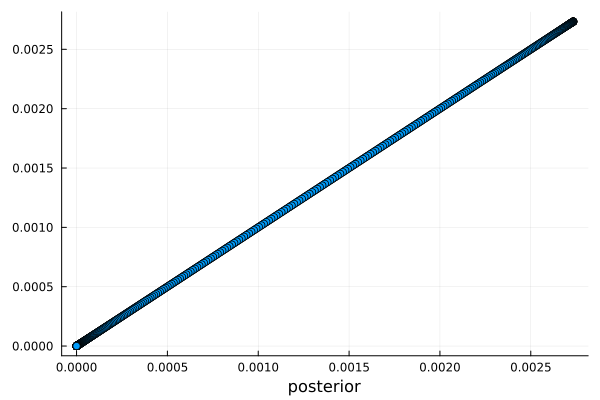

In [130]:
scatter(posterior, cat.p, xaxis="posterior")

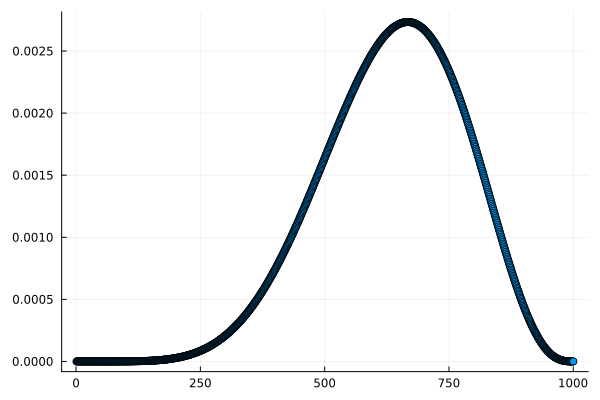

In [85]:
scatter(cat.support, cat.p)

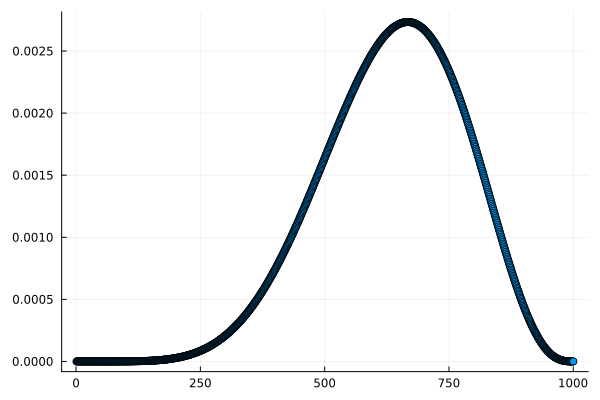

In [86]:
scatter(cat.support, posterior)

In [87]:
ncategories(cat)

1000

# Code 3.4

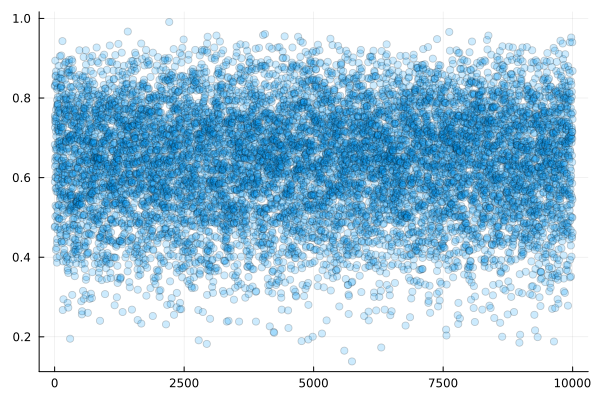

In [88]:
scatter(samples; alpha=0.2)

# Code 3.5

In [39]:
?density

search: density density! cdensity cdensity! KernelDensity DimensionMismatch



```
density(x)
density!(x)
```

Make a line plot of a kernel density estimate of x. The smoothness of the density plot is defined from `bandwidth` (real positive number).

# Arguments

  * `x`: AbstractVector of samples for probability density estimation

# Keyword arguments

  * `trim`::Bool: enables cutting off the distribution tails.
  * `bandwidth`::Number: a low bandwidth induces under-smoothing, whilst a high bandwidth induces over-smoothing.

# Examples

```julia-repl
julia> density(randn(100), bandwidth = -0.01, trim = false)
output : ERROR: Bandwidth must be positive

julia> density(randn(100), bandwidth = 0.1, trim = false)  # a curve with extremity and under-smoothing
julia> density(randn(100), bandwidth = 10, trim = true)  # a curve without extremity and over-smoothing
```

# Example

```julia-repl
julia> using StatsPlots
julia> density(randn(100_000))
```


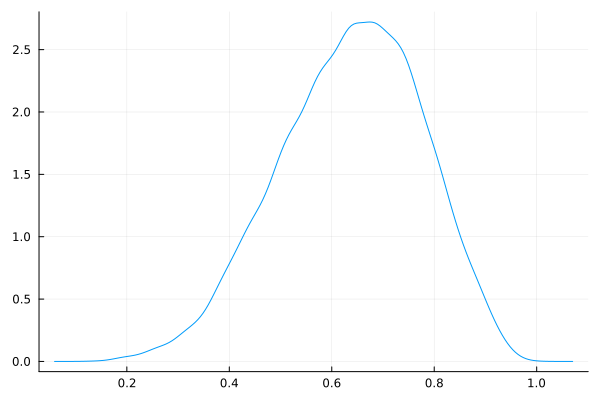

In [89]:
density(samples)

# Code 3.6

In [90]:
sum(posterior[p_grid .< 0.5])

0.17187458902022873

In [91]:
p_grid .< 0.5

1000-element BitVector:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

# Code 3.7

In [92]:
sum(samples .< 0.5) / samples_count

0.1722

In [173]:
samples .< 0.5

10000-element BitVector:
 1
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 1
 0

# Code 3.8

In [93]:
sum(@. (samples > 0.5) & (samples < 0.75)) / samples_count

0.6069

In [104]:
sum((samples .> 0.5) .& (samples .< 0.75))/ samples_count

0.6069

In [105]:
?@.

```
@. expr
```

Convert every function call or operator in `expr` into a "dot call" (e.g. convert `f(x)` to `f.(x)`), and convert every assignment in `expr` to a "dot assignment" (e.g. convert `+=` to `.+=`).

If you want to *avoid* adding dots for selected function calls in `expr`, splice those function calls in with `$`.  For example, `@. sqrt(abs($sort(x)))` is equivalent to `sqrt.(abs.(sort(x)))` (no dot for `sort`).

(`@.` is equivalent to a call to `@__dot__`.)

# Examples

```jldoctest
julia> x = 1.0:3.0; y = similar(x);

julia> @. y = x + 3 * sin(x)
3-element Vector{Float64}:
 3.5244129544236893
 4.727892280477045
 3.4233600241796016
```


# Code 3.9

In [14]:
quantile(samples, 0.8)

0.7607607607607607

# Code 3.10

In [174]:
quantile(samples, [0.1, 0.9])

2-element Vector{Float64}:
 0.45145145145145144
 0.8118118118118118

# Code 3.11

In [131]:
p_grid, posterior_3_3, samples_3_3 = construct_posterior_and_sampling(Int32(3), Int32(3))


p_grid = range(0, 1; length = size) = 0.0:0.001001001001001001:1.0


(0.0:0.001001001001001001:1.0, [0.0, 4.008012016020023e-12, 3.206409612816013e-11, 1.0821632443254061e-10, 2.5651276902528155e-10, 5.010015020025025e-10, 8.657305954603251e-10, 1.3747481214948658e-9, 2.0521021522022495e-9, 2.921840759678597e-9  …  0.0038889700511322133, 0.0039007667166666166, 0.003912587213840468, 0.003924431566701838, 0.003936299799298799, 0.003948191935679423, 0.003960107999891784, 0.003972048015983953, 0.0039840120080040006, 0.0039959999999999996], [0.8838838838838838, 0.6896896896896897, 0.5785785785785785, 0.6746746746746747, 0.998998998998999, 0.8108108108108109, 0.9359359359359359, 0.9419419419419419, 0.8998998998998999, 0.955955955955956  …  0.6586586586586587, 0.7497497497497497, 0.7847847847847848, 0.948948948948949, 0.8728728728728729, 0.8078078078078078, 0.985985985985986, 0.8578578578578578, 0.96996996996997, 0.8958958958958959])

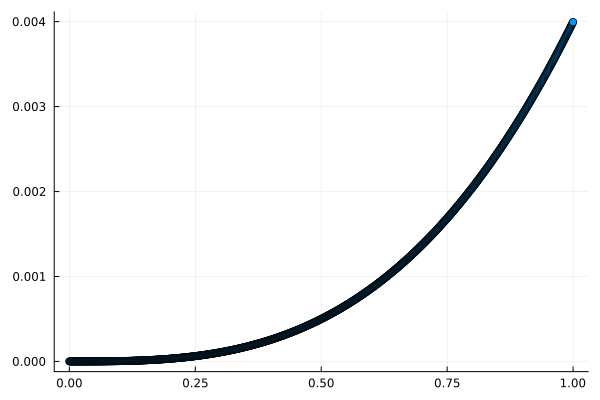

In [175]:
scatter(p_grid, posterior_3_3)

# Code 3.12

In [133]:
percentile(samples_3_3, [25, 75])

2-element Vector{Float64}:
 0.7107107107107107
 0.9309309309309309

# Code 3.13

In [134]:
hpdi(samples_3_3, alpha=0.5)

2-element Vector{Float64}:
 0.8428428428428428
 0.998998998998999

In [136]:
?hpdi

search: hpdi HPD chisqpdf nchisqpdf hyperpdf hypercdf MatrixReshaped hyperccdf



# hpdi

Compute high density region.

```julia
hpdi(x; alpha)

```

Derived from `hpd` in MCMCChains.jl.

By default alpha=0.11 for a 2-sided tail area of p < 0.055% and p > 0.945%.


In [137]:
parentmodule(hpdi)

StatisticalRethinking

# Code 3.14

In [135]:
p_grid[argmax(posterior_3_3)]

1.0

In [138]:
argmax(posterior_3_3)

1000

# Code 3.15

In [140]:
?kde

search: kde kde_lscv @kwdef isblockdev InterpKDE marginalkde marginalkde!



No documentation found.

`KernelDensity.kde` is a `Function`.

```
# 9 methods for generic function "kde" from KernelDensity:
 [1] kde(data::AbstractVector{<:Real}; bandwidth, kernel, npoints, boundary, weights)
     @ ~/.julia/packages/KernelDensity/wRVC2/src/univariate.jl:169
 [2] kde(data::AbstractVector{<:Real}, dist::UnivariateDistribution; boundary, npoints, weights)
     @ ~/.julia/packages/KernelDensity/wRVC2/src/univariate.jl:155
 [3] kde(data::AbstractVector{<:Real}, midpoints::R; bandwidth, kernel, weights) where R<:AbstractRange
     @ ~/.julia/packages/KernelDensity/wRVC2/src/univariate.jl:162
 [4] kde(data::AbstractVector{<:Real}, weights::Union{KernelDensity.UniformWeights, AbstractVector{<:Real}}, midpoints::R, dist::UnivariateDistribution) where R<:AbstractRange
     @ ~/.julia/packages/KernelDensity/wRVC2/src/univariate.jl:150
 [5] kde(data::Tuple{AbstractVector{<:Real}, AbstractVector{<:Real}}; bandwidth, kernel, boundary, npoints, weights)
     @ ~/.julia/packages/KernelDensity/wRVC2/src/bivariate.jl:134
 [6] kde(data::Tuple{AbstractVector{<:Real}, AbstractVector{<:Real}}, weights::Union{KernelDensity.UniformWeights, AbstractVector{<:Real}}, midpoints::Tuple{Rx, Ry}, dist::Union{Tuple{UnivariateDistribution, UnivariateDistribution}, MultivariateDistribution}) where {Rx<:AbstractRange, Ry<:AbstractRange}
     @ ~/.julia/packages/KernelDensity/wRVC2/src/bivariate.jl:108
 [7] kde(data::Tuple{AbstractVector{<:Real}, AbstractVector{<:Real}}, dist::Union{Tuple{UnivariateDistribution, UnivariateDistribution}, MultivariateDistribution}; boundary, npoints, weights)
     @ ~/.julia/packages/KernelDensity/wRVC2/src/bivariate.jl:114
 [8] kde(data::Tuple{AbstractVector{<:Real}, AbstractVector{<:Real}}, midpoints::Tuple{Rx, Ry}; bandwidth, kernel, weights) where {Rx<:AbstractRange, Ry<:AbstractRange}
     @ ~/.julia/packages/KernelDensity/wRVC2/src/bivariate.jl:126
 [9] kde(data::AbstractMatrix{<:Real}, args...; kwargs...)
     @ ~/.julia/packages/KernelDensity/wRVC2/src/bivariate.jl:150
```


In [139]:
k = kde(samples_3_3, bandwidth=0.01)
k.x[argmax(k.density)]

0.967609172435748

In [141]:
k

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(0.06510510510510512:0.0004762554445016585:1.04, [0.00011773018199057184, 9.68271929547293e-5, 7.976130347836508e-5, 6.59177060496341e-5, 5.4783087865772906e-5, 4.59314621922835e-5, 3.901194059124924e-5, 3.373823150221167e-5, 2.9879668791255032e-5, 2.7253591451947834e-5  …  0.0007866021934109096, 0.0006558883668885684, 0.0005457659941881833, 0.00045321016642017875, 0.0003756055412201635, 0.00031069727007371206, 0.0002565468672431001, 0.00021149268312863762, 0.00017411464299522603, 0.0001432029153490555])

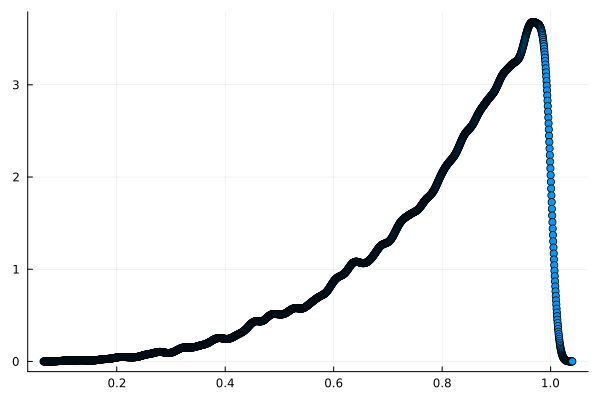

In [143]:
scatter(k.x, k.density)

# Code 3.16

In [144]:
mean(samples_3_3), median(samples_3_3)

(0.8011738738738738, 0.8438438438438438)

# Code 3.17

In [145]:
sum(@. posterior_3_3 * abs(0.5 - p_grid))

0.3128751874998122

In [148]:
# $ in front of median is to disable broadcast for median.
sum(@. posterior_3_3 * abs($median(samples_3_3) - p_grid))

0.12736121143168602

# Code 3.18

In [176]:
loss = map(d -> sum(@. posterior_3_3 * abs(d - p_grid)), p_grid);

# Code 3.19

In [178]:
median(samples_3_3)

0.8438438438438438

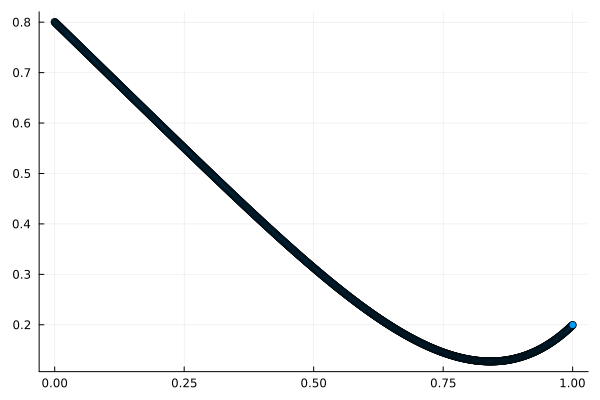

In [177]:
scatter(p_grid, loss)

In [24]:
p_grid[argmin(loss)]

0.8408408408408409

# Code 3.20

In [179]:
[pdf(Binomial(2, 0.7), x) for x ∈ 0:2]

3-element Vector{Float64}:
 0.09000000000000001
 0.41999999999999993
 0.4899999999999998

# Code 3.21

In [184]:
rand(Binomial(2, 0.7))

1

# Code 3.22

In [186]:
s = rand(Binomial(2, 0.7), 10)
println(s)

[2, 2, 2, 1, 1, 1, 1, 1, 1, 2]


# Code 3.23

In [187]:
dummy_w = rand(Binomial(2, 0.7), 100_000);
proportions(dummy_w)  # or counts(dummy_w)/100000

3-element Vector{Float64}:
 0.08913
 0.42116000000000003
 0.48971000000000003

In [158]:
counts(dummy_w)

3-element Vector{Int64}:
  9055
 42144
 48801

In [153]:
?counts

search: counts addcounts! codeunits countlines count_ones ncodeunits count_zeros



```
counts(x, [wv::AbstractWeights])
counts(x, levels::UnitRange{<:Integer}, [wv::AbstractWeights])
counts(x, k::Integer, [wv::AbstractWeights])
```

Count the number of times each value in `x` occurs. If `levels` is provided, only values falling in that range will be considered (the others will be ignored without raising an error or a warning). If an integer `k` is provided, only values in the range `1:k` will be considered.

If a vector of weights `wv` is provided, the proportion of weights is computed rather than the proportion of raw counts.

The output is a vector of length `length(levels)`.

---

```
counts(R::ClusteringResult) -> Vector{Int}
```

Get the vector of cluster sizes.

`counts(R)[k]` is the number of points assigned to the $k$-th cluster.

---

```
counts(a::ClusteringResult, b::ClusteringResult) -> Matrix{Int}
counts(a::ClusteringResult, b::AbstractVector{<:Integer}) -> Matrix{Int}
counts(a::AbstractVector{<:Integer}, b::ClusteringResult) -> Matrix{Int}
```

Calculate the *cross tabulation* (aka *contingency matrix*) for the two clusterings of the same data points.

Returns the $n_a × n_b$ matrix `C`, where $n_a$ and $n_b$ are the numbers of clusters in `a` and `b`, respectively, and `C[i, j]` is the size of the intersection of `i`-th cluster from `a` and `j`-th cluster from `b`.

The clusterings could be specified either as [`ClusteringResult`](@ref) instances or as vectors of data point assignments.


# Code 3.24

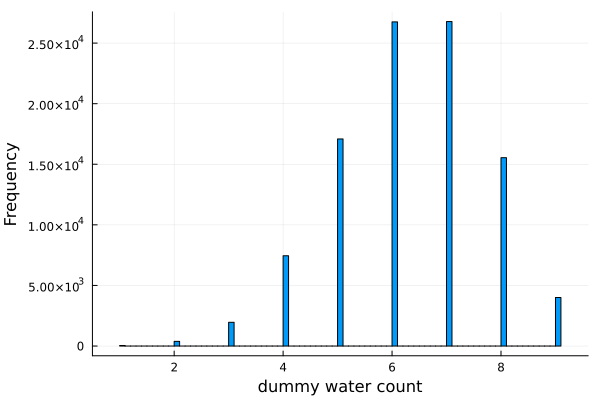

In [29]:
dummy_w = rand(Binomial(9, 0.7), 100_000);
histogram(dummy_w; xlabel="dummy water count", ylabel="Frequency")

# Code 3.25

In [188]:
w = rand(Binomial(9, 0.7), 10_000);

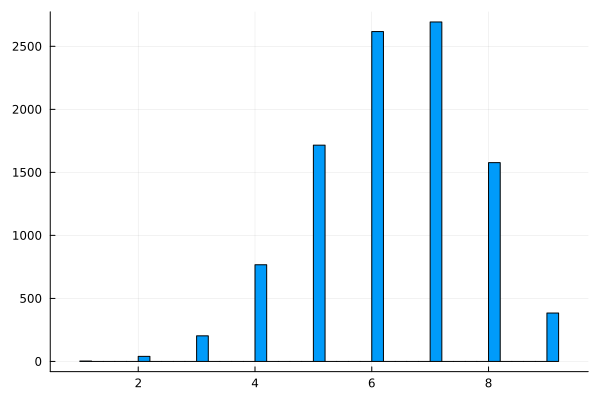

In [189]:
histogram(w)

In [171]:
@show (mean(w), median(w))

(mean(w), median(w)) = (5.3674, 5.0)


(5.3674, 5.0)

# Code 3.26

In [163]:
w = [rand(Binomial(9, p)) for p in samples];
length(samples)

10000

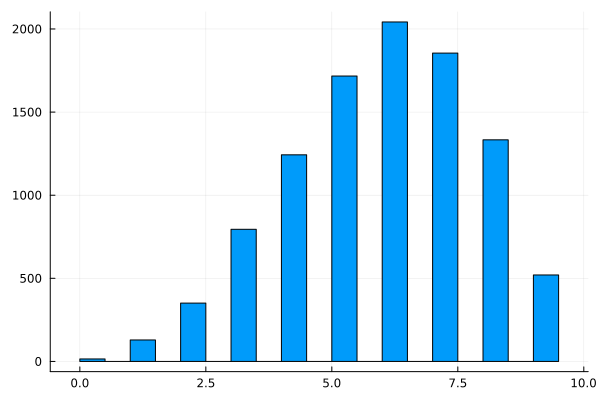

In [164]:
histogram(w) 

In [166]:
@show (mean(w), median(w))

(mean(w), median(w)) = (5.7354, 6.0)


(5.7354, 6.0)

In [167]:
percentile(w, [25, 75])

2-element Vector{Float64}:
 4.0
 7.0

In [168]:
hpdi(w, alpha=0.5)

2-element Vector{Int64}:
 4
 6